In [35]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing Pandas , NumPy, Matplotlib
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Importing datasets
leads_data = pd.read_csv("C:\\Users\\Laptop\\Downloads\\main course\\week16_lead_scoring_case_study\\Lead_Scoring_Case_Study\\Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [38]:
# dimensions of the dataframe
leads_data.shape

(9240, 37)

In [39]:
# statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [40]:
# type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [41]:
#Checking the number of nulls 
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [42]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [43]:
#identifying the columns having more than 50% of null values
cut_off=45
cols_to_drop=list(leads_data.columns[100*leads_data.isnull().mean()>cut_off]) #calculating % of null values
print(cols_to_drop)
print("No. of columns to drop: ",len(cols_to_drop))

['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
No. of columns to drop:  5


In [44]:
for col in leads_data.columns:
    print(leads_data[col].astype('category').value_counts())

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [45]:
#dropping the cols with more than 45% missing value and columns with skewed/less variance data
leads_data.drop(['A free copy of Mastering The Interview','Do Not Call','Do Not Email','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'], axis=1, inplace=True)

In [46]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
Last Notable Activity                             0.00
dtype: flo

In [47]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [48]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,Select,Select,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai,Modified


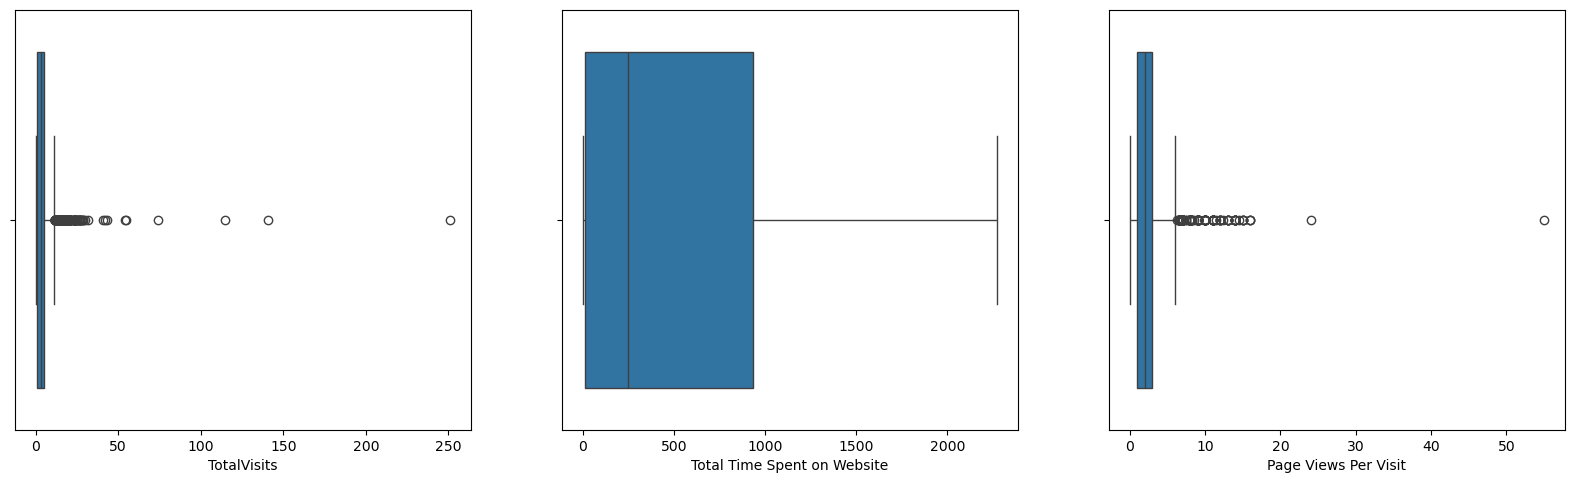

In [49]:
#Distribution of numeric variables using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'TotalVisits', data = leads_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads_data)
plt.show()

In [50]:
#Creating a function to generate graphs as subplots for the dataset and columns passed as argument to the function.
def plot_graph(dataset, col):
    fig = plt.figure(figsize=(15,10),tight_layout=True)
    
    ax1 = plt.subplot(221)
    dataset[col].value_counts(normalize=True).plot.bar(ax=ax1)  #Creates Bar graph showing % values of the column
    plt.xticks(rotation=90)
    plt.title('% Distribution of the column : '+ col,fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})

    ax2 = plt.subplot(222)
    pd.crosstab(dataset[col],leads_data.Converted).plot.bar(ax=ax2)  #Creates Bar graph showing Column Vs Target variable in terms of total count
    plt.xticks(rotation=90)
    plt.title(col +' vs Converted in terms of total count', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})
    plt.show()

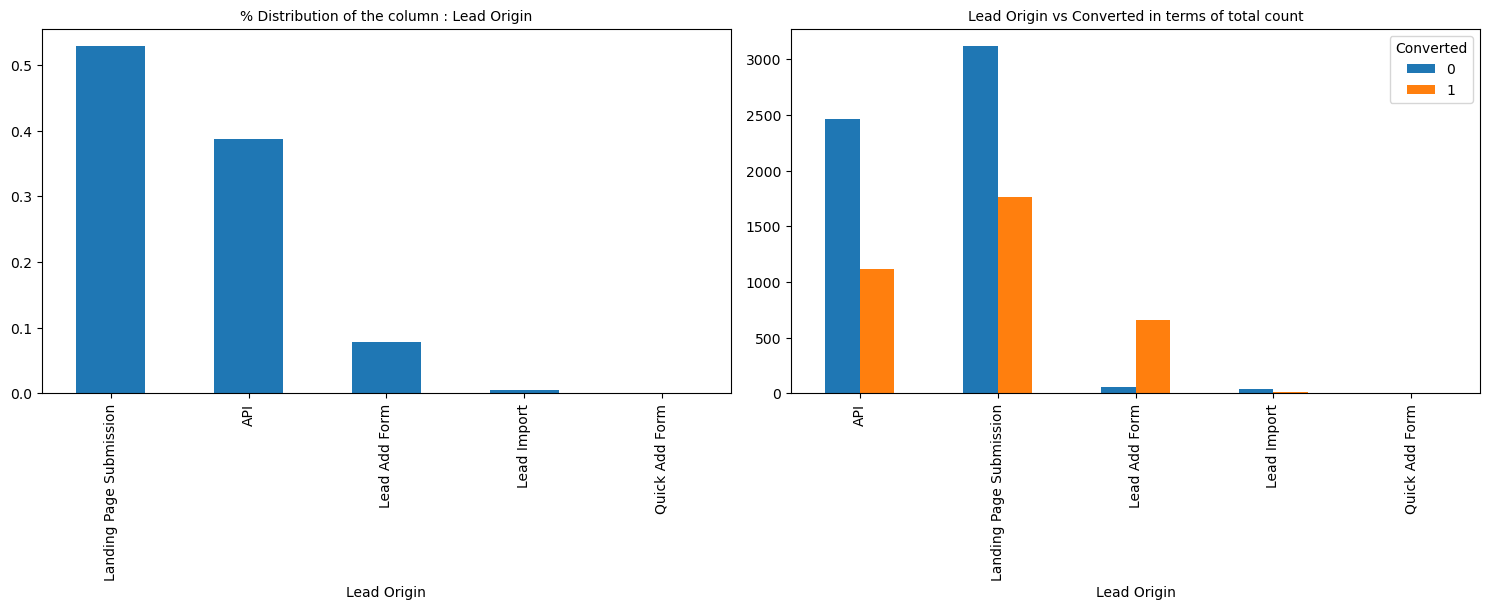

In [51]:
plot_graph(leads_data,'Lead Origin')

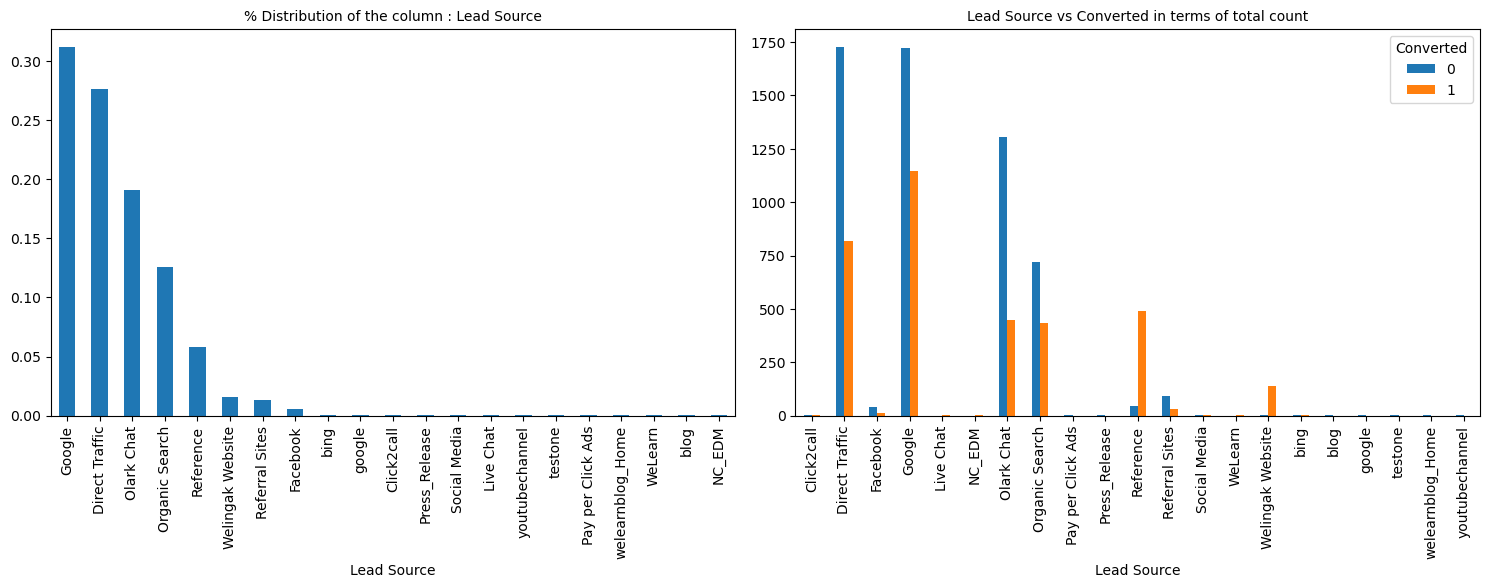

In [52]:
plot_graph(leads_data,'Lead Source')

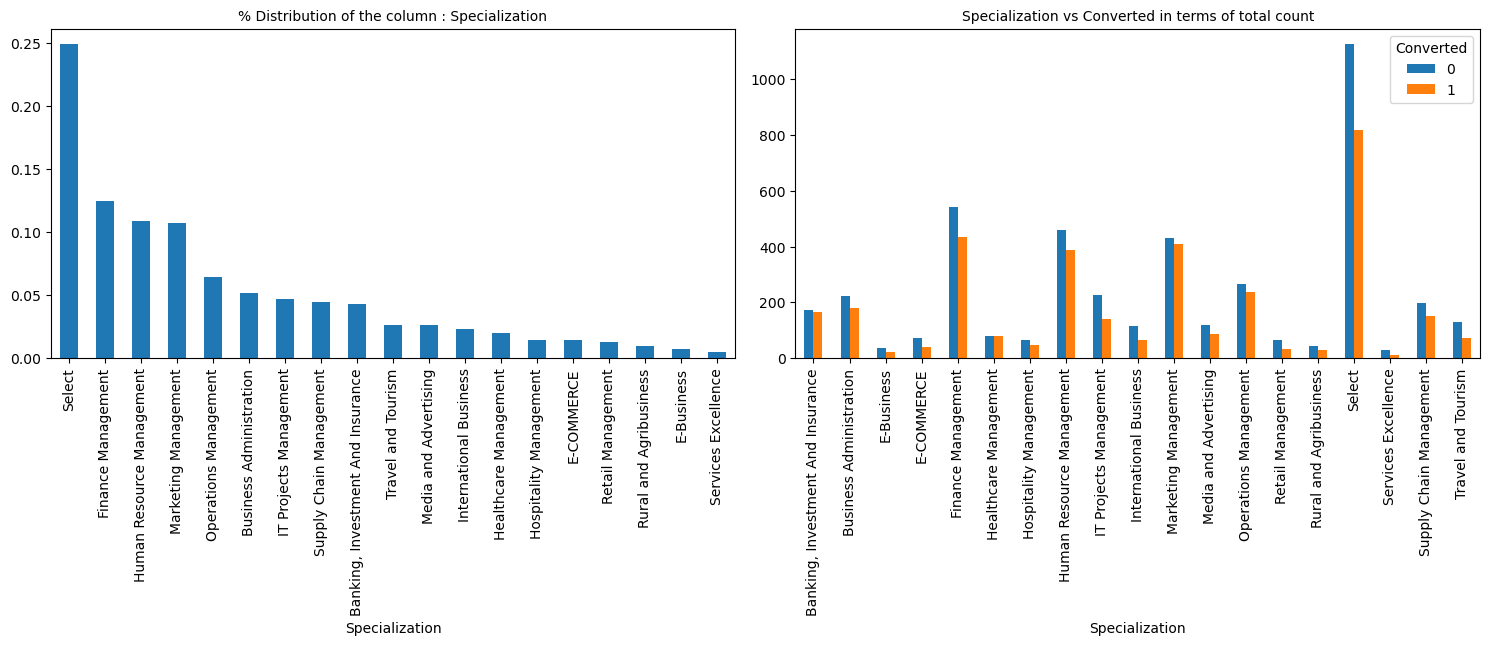

In [53]:
plot_graph(leads_data,'Specialization')

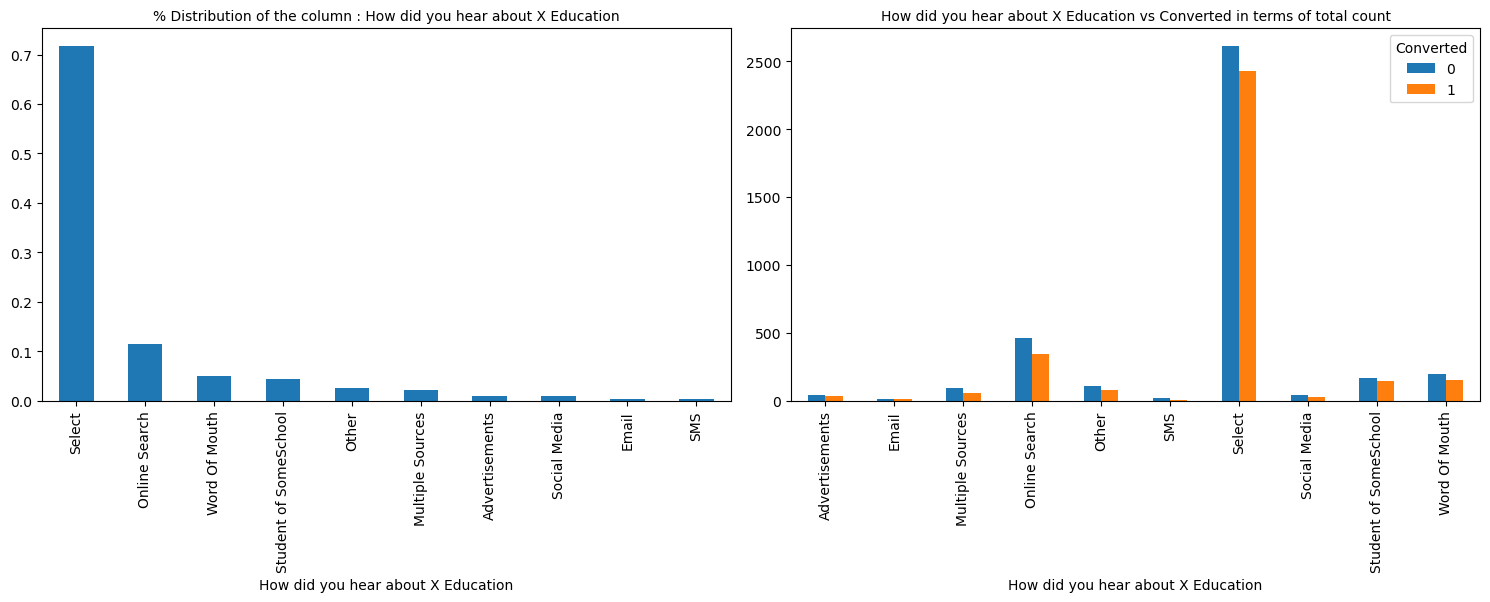

In [54]:
plot_graph(leads_data,'How did you hear about X Education')

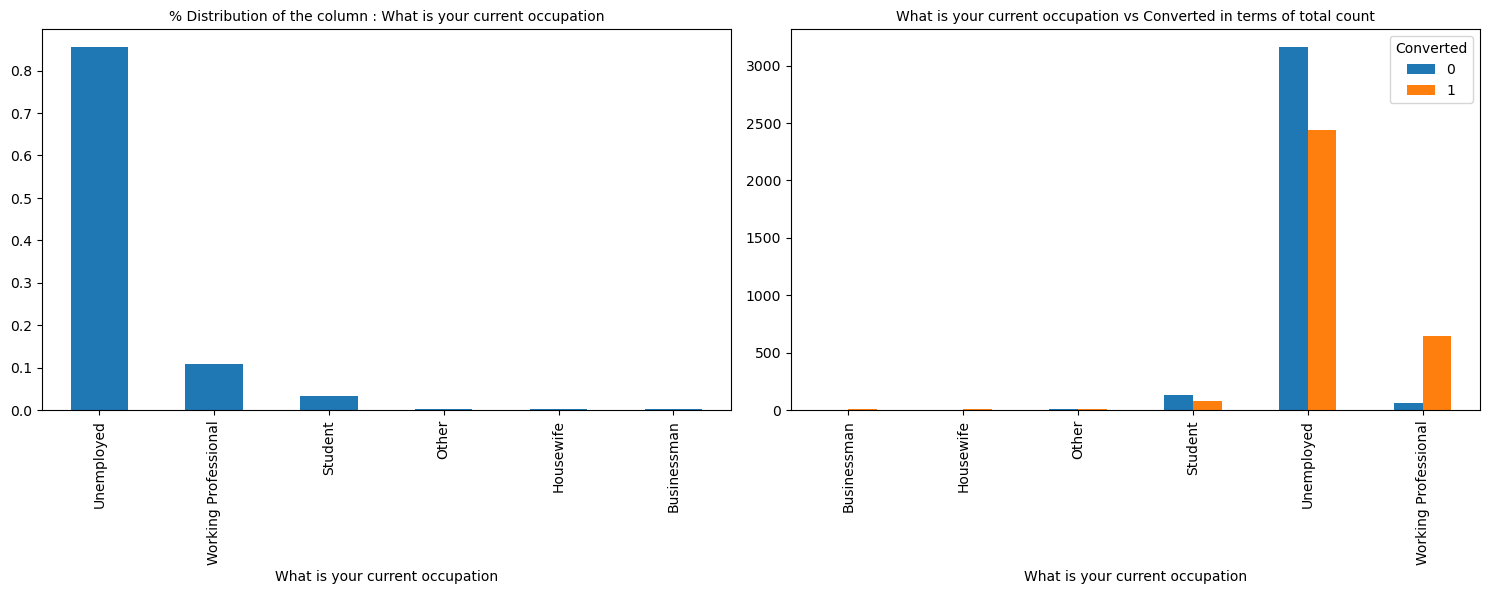

In [55]:
plot_graph(leads_data,'What is your current occupation')

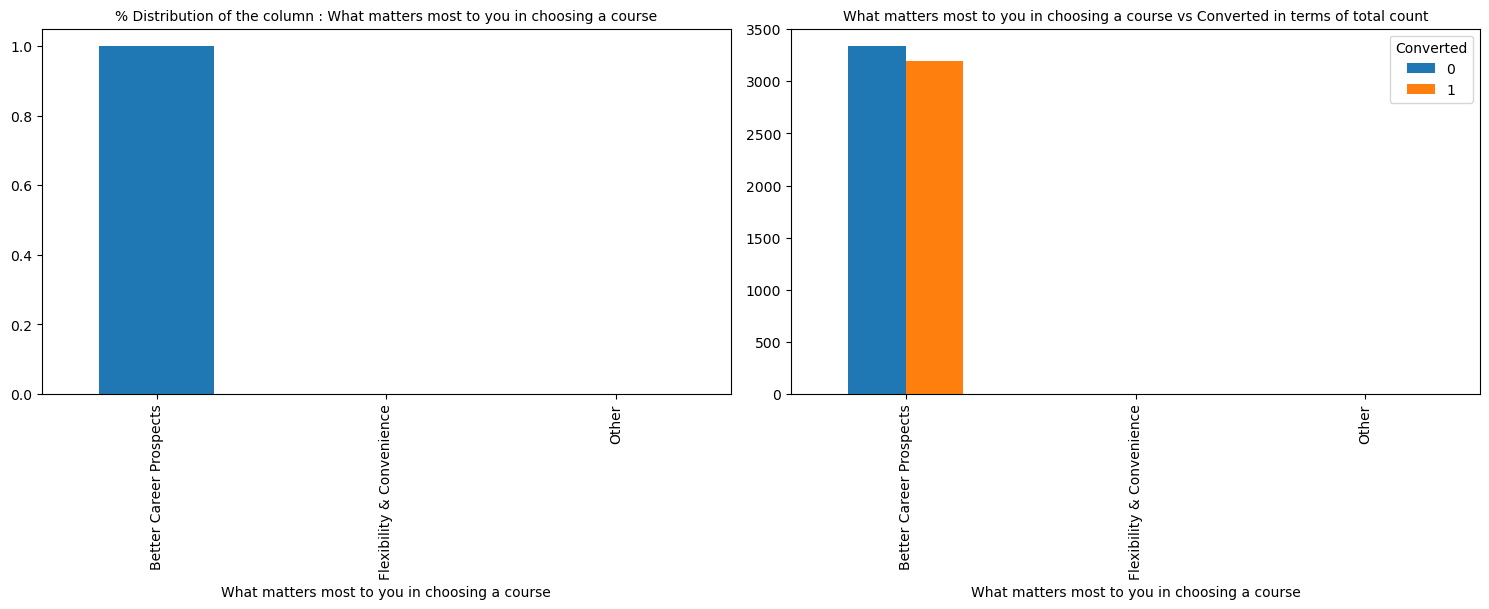

In [56]:
plot_graph(leads_data,'What matters most to you in choosing a course')

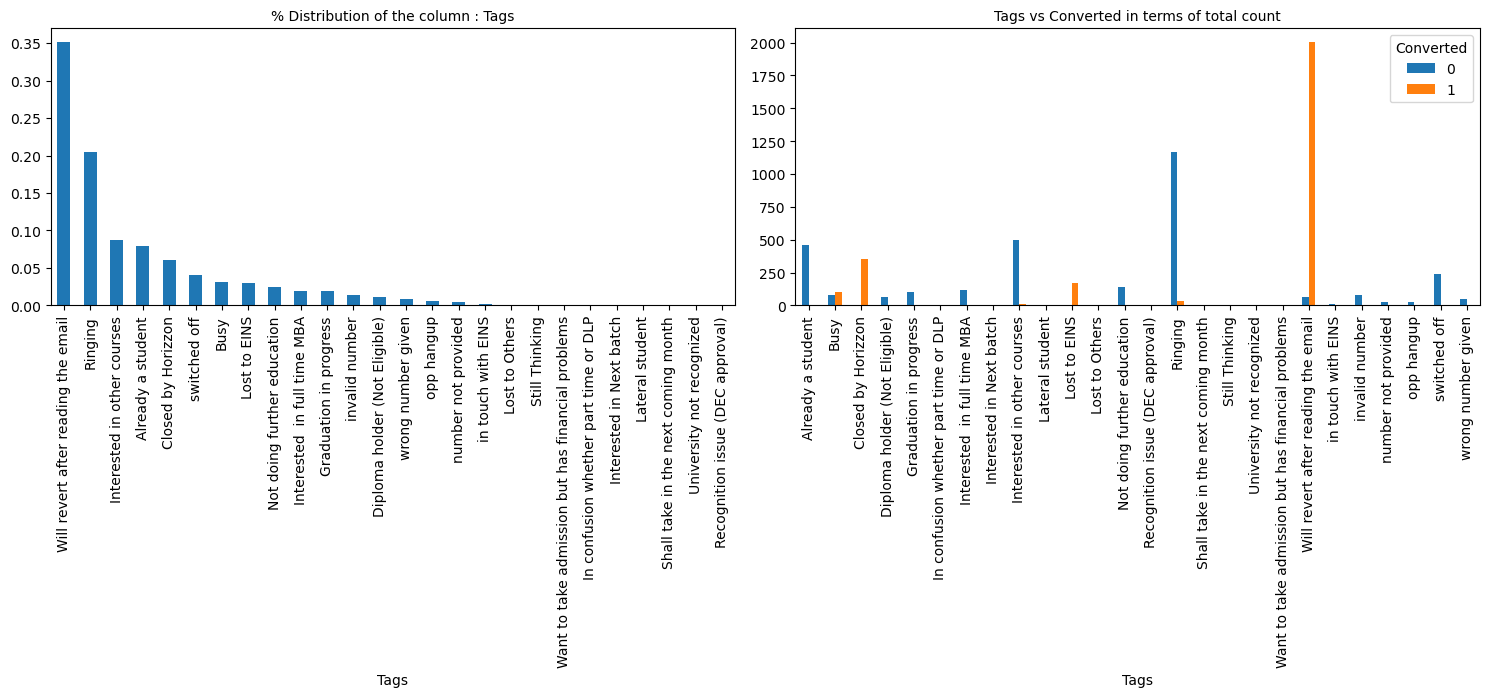

In [57]:
plot_graph(leads_data,'Tags')

In [59]:
# Checking for outliers in the continuous variables
leads_data_num = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [60]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_data_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [62]:
p_99 = leads_data['TotalVisits'].quantile(0.99) # 99th quantile
p_05 = leads_data['TotalVisits'].quantile(0.05) # 99th quantile

In [65]:
leads_data['TotalVisits'].clip(p_05,p_99, inplace=True)

In [71]:
p_99 = leads_data['Page Views Per Visit'].quantile(0.99) # 99th quantile
p_05 = leads_data['Page Views Per Visit'].quantile(0.05) # 99th quantile
leads_data['Page Views Per Visit'].clip(p_05,p_99, inplace=True)

In [72]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_data.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.332747,487.698268,2.334002
std,23405.995698,0.486714,3.252420,548.021466,1.985712
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000


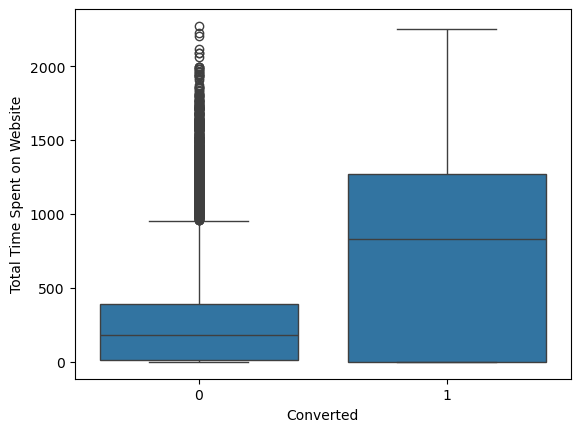

In [67]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="Total Time Spent on Website")
plt.show()

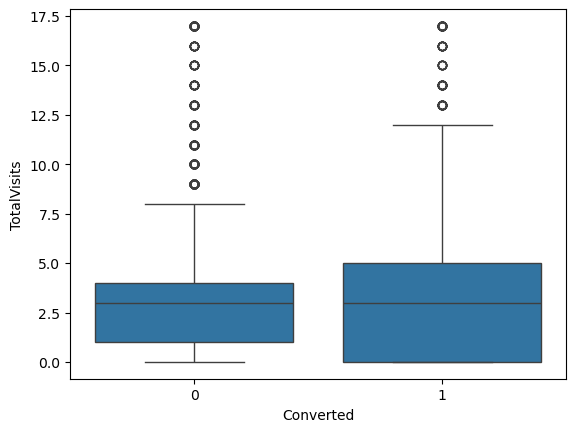

In [68]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="TotalVisits")
plt.show()

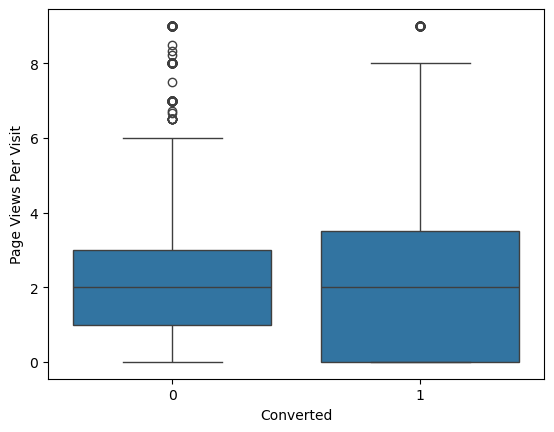

In [73]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="Page Views Per Visit")
plt.show()